In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,3,2022-03-15T00:20:31Z,2022-03-15T00:20:36Z,2022-03-15T00:22:08Z,2022-03-15T00:22:08Z,2m14.639216895s,6.482570
1,hpccfft,5,16,4,4,2022-03-15T00:21:31Z,2022-03-15T01:22:58Z,2022-03-15T01:26:23Z,2022-03-15T01:26:23Z,1h5m34.639640175s,1.245240
2,hpccfft,7,16,4,4,2022-03-15T00:21:31Z,2022-03-15T01:27:09Z,2022-03-15T01:30:35Z,2022-03-15T01:30:35Z,1h9m37.351877238s,1.249220
3,hpccptrans,5,16,3,3,2022-03-15T00:22:32Z,2022-03-15T00:46:08Z,2022-03-15T00:51:06Z,2022-03-15T00:51:06Z,29m7.608021058s,0.234415
4,hpccptrans,1,16,3,3,2022-03-15T00:22:32Z,2022-03-15T00:22:48Z,2022-03-15T00:27:35Z,2022-03-15T00:27:35Z,5m43.65326053s,0.292694
...,...,...,...,...,...,...,...,...,...,...,...
135,hpccfft,8,16,3,3,2022-03-15T00:29:41Z,2022-03-15T02:14:33Z,2022-03-15T02:18:18Z,2022-03-15T02:18:18Z,1h49m14.630105113s,1.083420
136,hpccptrans,9,16,4,4,2022-03-15T00:31:42Z,2022-03-15T02:24:51Z,2022-03-15T02:29:43Z,2022-03-15T02:29:43Z,1h58m43.622721979s,0.301751
137,hpccfft,9,16,3,3,2022-03-15T00:32:42Z,2022-03-15T02:30:19Z,2022-03-15T02:34:01Z,2022-03-15T02:34:01Z,2h1m53.644145955s,1.098770
138,hpccrandomaccess,0,16,4,4,2022-03-15T00:34:42Z,2022-03-15T02:34:39Z,2022-03-15T02:37:28Z,2022-03-15T02:37:28Z,2h3m23.637800519s,0.025387


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,3,2022-03-15 00:20:31+00:00,2022-03-15 00:20:36+00:00,2022-03-15 00:22:08+00:00,2022-03-15 00:22:08+00:00,0 days 00:02:14.639216895,6.482570,0 days 00:00:05,0 days 00:01:32,0 days
1,hpccfft,5,16,4,4,2022-03-15 00:21:31+00:00,2022-03-15 01:22:58+00:00,2022-03-15 01:26:23+00:00,2022-03-15 01:26:23+00:00,0 days 01:05:34.639640175,1.245240,0 days 01:01:27,0 days 00:03:25,0 days
2,hpccfft,7,16,4,4,2022-03-15 00:21:31+00:00,2022-03-15 01:27:09+00:00,2022-03-15 01:30:35+00:00,2022-03-15 01:30:35+00:00,0 days 01:09:37.351877238,1.249220,0 days 01:05:38,0 days 00:03:26,0 days
3,hpccptrans,5,16,3,3,2022-03-15 00:22:32+00:00,2022-03-15 00:46:08+00:00,2022-03-15 00:51:06+00:00,2022-03-15 00:51:06+00:00,0 days 00:29:07.608021058,0.234415,0 days 00:23:36,0 days 00:04:58,0 days
4,hpccptrans,1,16,3,3,2022-03-15 00:22:32+00:00,2022-03-15 00:22:48+00:00,2022-03-15 00:27:35+00:00,2022-03-15 00:27:35+00:00,0 days 00:05:43.653260530,0.292694,0 days 00:00:16,0 days 00:04:47,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccfft,8,16,3,3,2022-03-15 00:29:41+00:00,2022-03-15 02:14:33+00:00,2022-03-15 02:18:18+00:00,2022-03-15 02:18:18+00:00,0 days 01:49:14.630105113,1.083420,0 days 01:44:52,0 days 00:03:45,0 days
136,hpccptrans,9,16,4,4,2022-03-15 00:31:42+00:00,2022-03-15 02:24:51+00:00,2022-03-15 02:29:43+00:00,2022-03-15 02:29:43+00:00,0 days 01:58:43.622721979,0.301751,0 days 01:53:09,0 days 00:04:52,0 days
137,hpccfft,9,16,3,3,2022-03-15 00:32:42+00:00,2022-03-15 02:30:19+00:00,2022-03-15 02:34:01+00:00,2022-03-15 02:34:01+00:00,0 days 02:01:53.644145955,1.098770,0 days 01:57:37,0 days 00:03:42,0 days
138,hpccrandomaccess,0,16,4,4,2022-03-15 00:34:42+00:00,2022-03-15 02:34:39+00:00,2022-03-15 02:37:28+00:00,2022-03-15 02:37:28+00:00,0 days 02:03:23.637800519,0.025387,0 days 01:59:57,0 days 00:02:49,0 days


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-15 00:20:31+00:00,2022-03-15 00:20:36+00:00,2022-03-15 00:22:08+00:00,2022-03-15 00:22:08+00:00,0 days 00:02:14.639216895,6.482570,0 days 00:00:05,0 days 00:01:32,0 days,2022-03-15 00:20:31+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 00:21:31+00:00,2022-03-15 01:22:58+00:00,2022-03-15 01:26:23+00:00,2022-03-15 01:26:23+00:00,0 days 01:05:34.639640175,1.245240,0 days 01:01:27,0 days 00:03:25,0 days,2022-03-15 00:20:31+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 00:21:31+00:00,2022-03-15 01:27:09+00:00,2022-03-15 01:30:35+00:00,2022-03-15 01:30:35+00:00,0 days 01:09:37.351877238,1.249220,0 days 01:05:38,0 days 00:03:26,0 days,2022-03-15 00:20:31+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 00:22:32+00:00,2022-03-15 00:46:08+00:00,2022-03-15 00:51:06+00:00,2022-03-15 00:51:06+00:00,0 days 00:29:07.608021058,0.234415,0 days 00:23:36,0 days 00:04:58,0 days,2022-03-15 00:20:31+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-15 00:22:32+00:00,2022-03-15 00:22:48+00:00,2022-03-15 00:27:35+00:00,2022-03-15 00:27:35+00:00,0 days 00:05:43.653260530,0.292694,0 days 00:00:16,0 days 00:04:47,0 days,2022-03-15 00:20:31+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccfft,8,16,3,3,2022-03-15 00:29:41+00:00,2022-03-15 02:14:33+00:00,2022-03-15 02:18:18+00:00,2022-03-15 02:18:18+00:00,0 days 01:49:14.630105113,1.083420,0 days 01:44:52,0 days 00:03:45,0 days,2022-03-15 00:20:31+00:00,0 days 00:09:10
136,hpccptrans,9,16,4,4,2022-03-15 00:31:42+00:00,2022-03-15 02:24:51+00:00,2022-03-15 02:29:43+00:00,2022-03-15 02:29:43+00:00,0 days 01:58:43.622721979,0.301751,0 days 01:53:09,0 days 00:04:52,0 days,2022-03-15 00:20:31+00:00,0 days 00:11:11
137,hpccfft,9,16,3,3,2022-03-15 00:32:42+00:00,2022-03-15 02:30:19+00:00,2022-03-15 02:34:01+00:00,2022-03-15 02:34:01+00:00,0 days 02:01:53.644145955,1.098770,0 days 01:57:37,0 days 00:03:42,0 days,2022-03-15 00:20:31+00:00,0 days 00:12:11
138,hpccrandomaccess,0,16,4,4,2022-03-15 00:34:42+00:00,2022-03-15 02:34:39+00:00,2022-03-15 02:37:28+00:00,2022-03-15 02:37:28+00:00,0 days 02:03:23.637800519,0.025387,0 days 01:59:57,0 days 00:02:49,0 days,2022-03-15 00:20:31+00:00,0 days 00:14:11


In [7]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([3, 4, 1, 2])

#  performance

In [9]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [10]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,3,6.459607,0.041300
0,hpccstream,16,2,2,5.129160,0.020853
0,hpccstream,16,1,1,2.745510,0.001781
0,hpccfft,16,4,4,1.252653,0.007840
0,hpccfft,16,1,1,10.357830,0.461303
0,hpccfft,16,2,2,0.961296,0.009491
0,hpccfft,16,3,3,1.091095,0.007675
0,hpccptrans,16,3,3,0.255738,0.034309
0,hpccptrans,16,1,1,5.810490,1.424640
0,hpccptrans,16,2,2,0.253975,0.024845


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3         3         6.459607        0.041300
0  hpccstream      16       2         2         5.129160        0.020853
0  hpccstream      16       1         1         2.745510        0.001781
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         1.252653        0.007840
0   hpccfft      16       1         1        10.357830        0.461303
0   hpccfft      16       2         2         0.961296        0.009491
0   hpccfft      16       3         3         1.091095        0.007675
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.255738        0.034309
0  hpccptrans      16       1         1         5.810490        1.424640
0  hpccptrans      16       2         2         0.253975        0.024845
0  hpccptrans      16       4         4         0.301751     

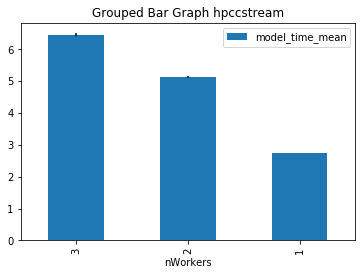

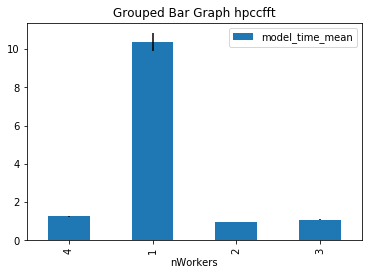

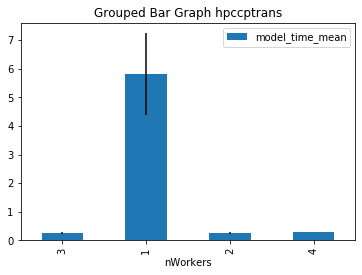

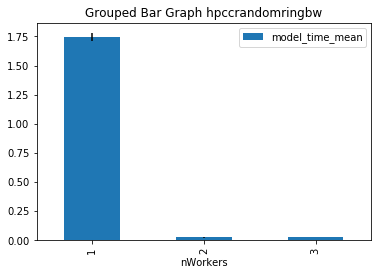

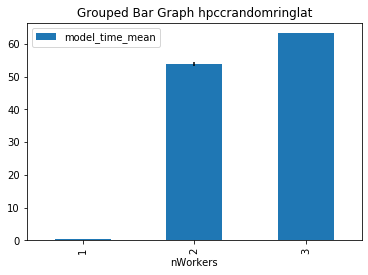

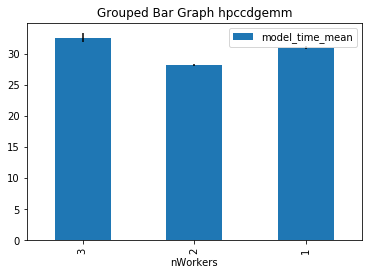

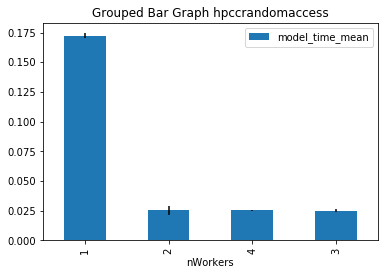

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [12]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [13]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,3,0 days 01:01:54.250000,0 days 00:37:46.882702633,0 days 00:01:31.750000,0 days 00:00:00.433012701,0 days 00:00:00,0 days 00:00:00,0 days 01:04:05.883920526,0 days 00:37:47.853682943
0,hpccstream,16,2,2,0 days 00:27:35.333333333,0 days 00:09:48.468256483,0 days 00:01:32,0 days 00:00:00.816496580,0 days 00:00:00,0 days 00:00:00,0 days 00:29:44.305194112,0 days 00:09:49.930052048
0,hpccstream,16,1,1,0 days 00:13:38,0 days 00:01:37.887690748,0 days 00:01:49,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:16:05.507487396,0 days 00:01:38.518564954
0,hpccfft,16,4,4,0 days 01:11:29,0 days 00:11:21.619150748,0 days 00:03:25,0 days 00:00:00.816496580,0 days 00:00:00,0 days 00:00:00,0 days 01:15:33.542072851,0 days 00:11:22.582719755
0,hpccfft,16,1,1,0 days 00:08:28.333333333,0 days 00:02:43.923423856,0 days 00:01:26.666666666,0 days 00:00:00.942809041,0 days 00:00:00,0 days 00:00:00,0 days 00:10:29.631888139,0 days 00:02:45.715546766
0,hpccfft,16,2,2,0 days 00:33:49.500000,0 days 00:02:38.500000,0 days 00:03:56,0 days 00:00:01,0 days 00:00:00,0 days 00:00:00,0 days 00:38:23.310936230,0 days 00:02:41.320256493
0,hpccfft,16,3,3,0 days 01:51:14.500000,0 days 00:06:22.500000,0 days 00:03:43.500000,0 days 00:00:01.500000,0 days 00:00:00,0 days 00:00:00,0 days 01:55:34.137125534,0 days 00:06:19.507020421
0,hpccptrans,16,3,3,0 days 00:42:18.750000,0 days 00:31:40.834208314,0 days 00:04:52.500000,0 days 00:00:10.965856099,0 days 00:00:00,0 days 00:00:00,0 days 00:47:47.335148750,0 days 00:31:41.510239842
0,hpccptrans,16,1,1,0 days 00:10:31,0 days 00:00:27,0 days 00:01:48,0 days 00:00:08,0 days 00:00:00,0 days 00:00:00,0 days 00:12:53.431862731,0 days 00:00:36.786270164
0,hpccptrans,16,2,2,0 days 00:35:58.666666666,0 days 00:04:28.627788750,0 days 00:04:39.333333333,0 days 00:00:24.850665092,0 days 00:00:00,0 days 00:00:00,0 days 00:41:16.851336084,0 days 00:04:52.732698751


<ipython-input-14-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



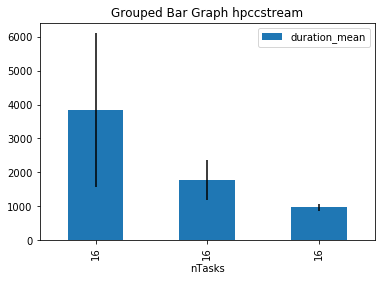

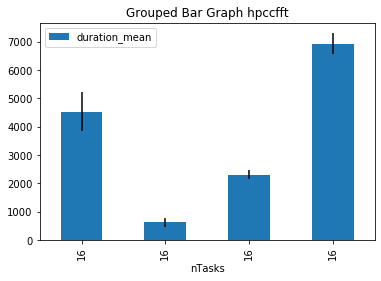

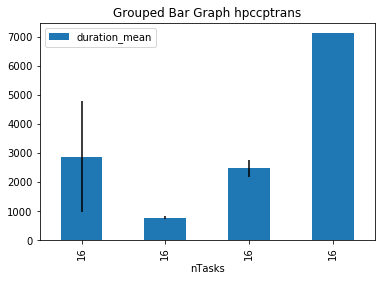

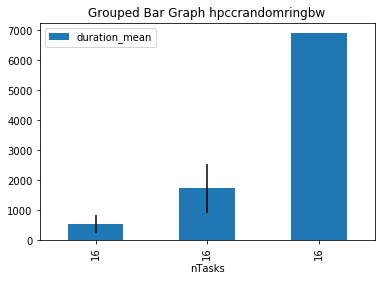

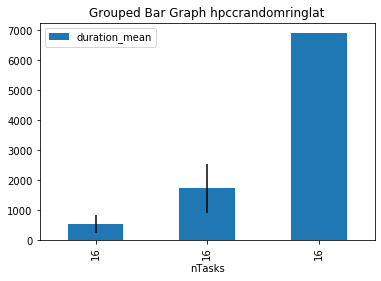

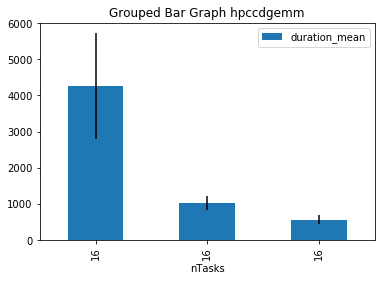

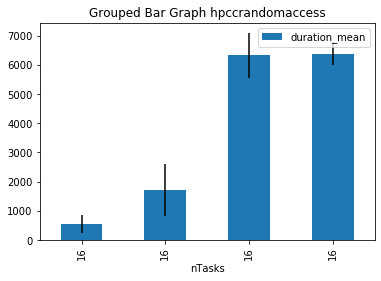

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [15]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

NameError: name 'nTasks' is not defined

In [ ]:
df_time = pd.concat(df_time, axis=0)
df_time

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [ ]:
df

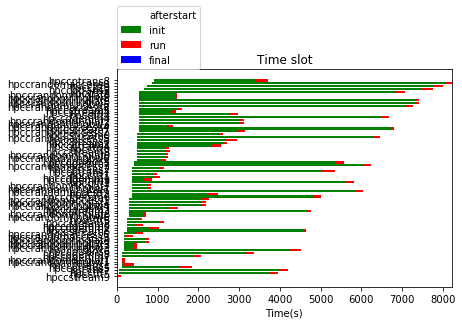

In [16]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
